# AttentionGo Burst1: PreProcessing

This script specifies the preprocessing pipeline from Hilger et al. (submitted 2020): "Neurophysiological Signatures of Attentional Problems and Executive Functioning in Mid-Childhood: A Dimensional Perspective on ADHD Symptoms."


The data of the whole project will be deposit on zenodo.org after acquisition and preparation of all measurements has been finished (part of ongoing longitudinal project, see Hilger et al. submitted). The data used in the actual study can be assessed from the authors upon direct request.
- EEG data path: /data/hippocampus/02_ADHD_Var/02_Data/04_Burst01/AttentionGo_Burst1_EEG_C/
- Behavioral data path: /data/hippocampus/02_ADHD_Var/02_Data/04_Burst01/AttentionGo_Burst1_Verhalten_C

In [2]:
# Imports

%matplotlib inline
%config InlineBackend.figure_format='retina'

from os import stat
import pickle

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mne
from autoreject import AutoReject

def get_csv_file(name):
    csv_files = glob("../../02_Data/04_Burst01/AttentionGo_Burst1_Verhalten_C/Experiment/{}/*.csv".format(name))
    csv_file = csv_files[np.argmax([stat(f).st_size for f in csv_files])]

    return pd.read_csv(csv_file, index_col=0)

In [3]:
# import files - seperate files from words with glob
from glob import glob
files = glob("../../02_Data/04_Burst01/AttentionGo_Burst1_EEG_C/*Oddball.vhdr")
template = "../../jona_data/{0}/{1}-{0}.fif"

In [4]:
# list of data and names of subjects
subj_data = pd.read_csv("../../jona_data/00_AttentionGo_Burst1_JS.csv", sep=";", index_col=1)

In [5]:
files # check if you have all files

['../../02_Data/04_Burst01/AttentionGo_Burst1_EEG_C/asi59_CPT_Oddball.vhdr',
 '../../02_Data/04_Burst01/AttentionGo_Burst1_EEG_C/cqu50_CPT_Oddball.vhdr',
 '../../02_Data/04_Burst01/AttentionGo_Burst1_EEG_C/dof35_CPT_Oddball.vhdr',
 '../../02_Data/04_Burst01/AttentionGo_Burst1_EEG_C/edj10_CPT_Oddball.vhdr',
 '../../02_Data/04_Burst01/AttentionGo_Burst1_EEG_C/gjr08_CPT_Oddball.vhdr',
 '../../02_Data/04_Burst01/AttentionGo_Burst1_EEG_C/gqb40_CPT_Oddball.vhdr',
 '../../02_Data/04_Burst01/AttentionGo_Burst1_EEG_C/gzx34_CPT_Oddball.vhdr',
 '../../02_Data/04_Burst01/AttentionGo_Burst1_EEG_C/hju33_CPT_Oddball.vhdr',
 '../../02_Data/04_Burst01/AttentionGo_Burst1_EEG_C/hxd32_CPT_Oddball.vhdr',
 '../../02_Data/04_Burst01/AttentionGo_Burst1_EEG_C/hxg18_CPT_Oddball.vhdr',
 '../../02_Data/04_Burst01/AttentionGo_Burst1_EEG_C/ihz41_CPT_Oddball.vhdr',
 '../../02_Data/04_Burst01/AttentionGo_Burst1_EEG_C/isv05_CPT_Oddball.vhdr',
 '../../02_Data/04_Burst01/AttentionGo_Burst1_EEG_C/jny15_CPT_Oddball.vhdr',

In [6]:
len(files)

32

In [7]:
# cap montage file
montage = mne.channels.read_montage("/data/hippocampus/02_ADHD_Var/standard.elp")

In [8]:
# definition of function to make the raw and ica objects for each subject
def make_raw_and_ica(file):
    name = file.split("/")[-1].split("_")[0]
    raw = mne.io.read_raw_brainvision(file, preload=True).resample(200, n_jobs=-1).filter(.1, 30)
    mne.add_reference_channels(raw, ["FCz"], copy=False)
    raw.set_eeg_reference([])
    raw.set_montage(montage)
    raw.save(template.format("raw", name), overwrite=True)
    ica = mne.preprocessing.ICA(n_components=60).fit(raw.filter(8, None)) # estimates ICA fro each participant
    ica.save(template.format("ica", name))

In [ ]:
# make raw and ica objects (application of the above defined function) 
# ATTENTION: do not make this several times. Objects will be saved on your disc. 
for file in files:
    make_raw_and_ica(file)

In [9]:
# just as an example - test if you can load raw object from one subject
name = "wmp06"
raw = mne.io.read_raw_fif(template.format("raw", name), preload=True) # read(load) raw object
raw # look into raw object

Opening raw data file /data/hippocampus/02_ADHD_Var/jona_data/raw/wmp06-raw.fif...
    Range : 0 ... 342059 =      0.000 ...  1710.295 secs
Ready.
Reading 0 ... 342059  =      0.000 ...  1710.295 secs...


<Raw  |  wmp06-raw.fif, n_channels x n_times : 64 x 342060 (1710.3 sec), ~167.2 MB, data loaded>

In [10]:
# just as an example - test if you can load ica object from one subject
ica = mne.preprocessing.read_ica(template.format("ica", name))

Reading ../../jona_data/ica/wmp06-ica.fif ...
Now restoring ICA solution ...
Ready.


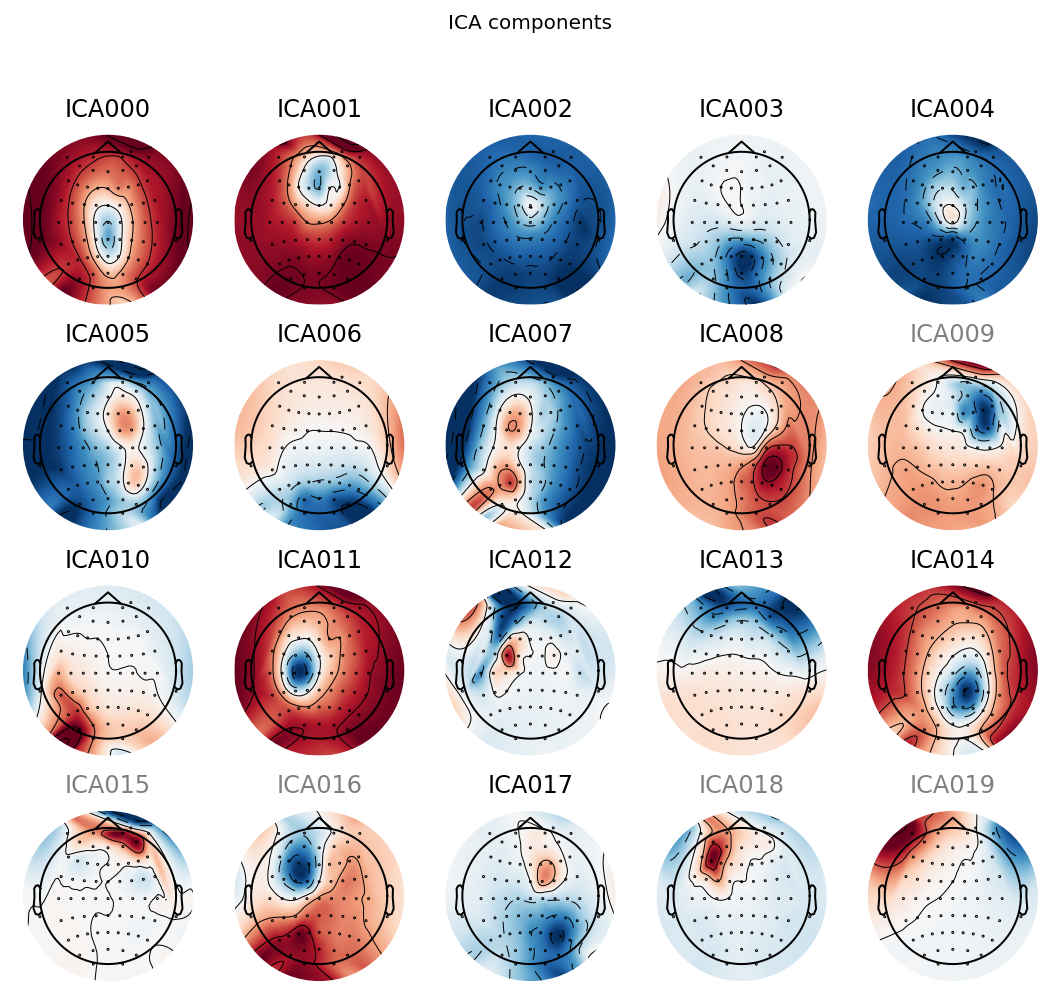

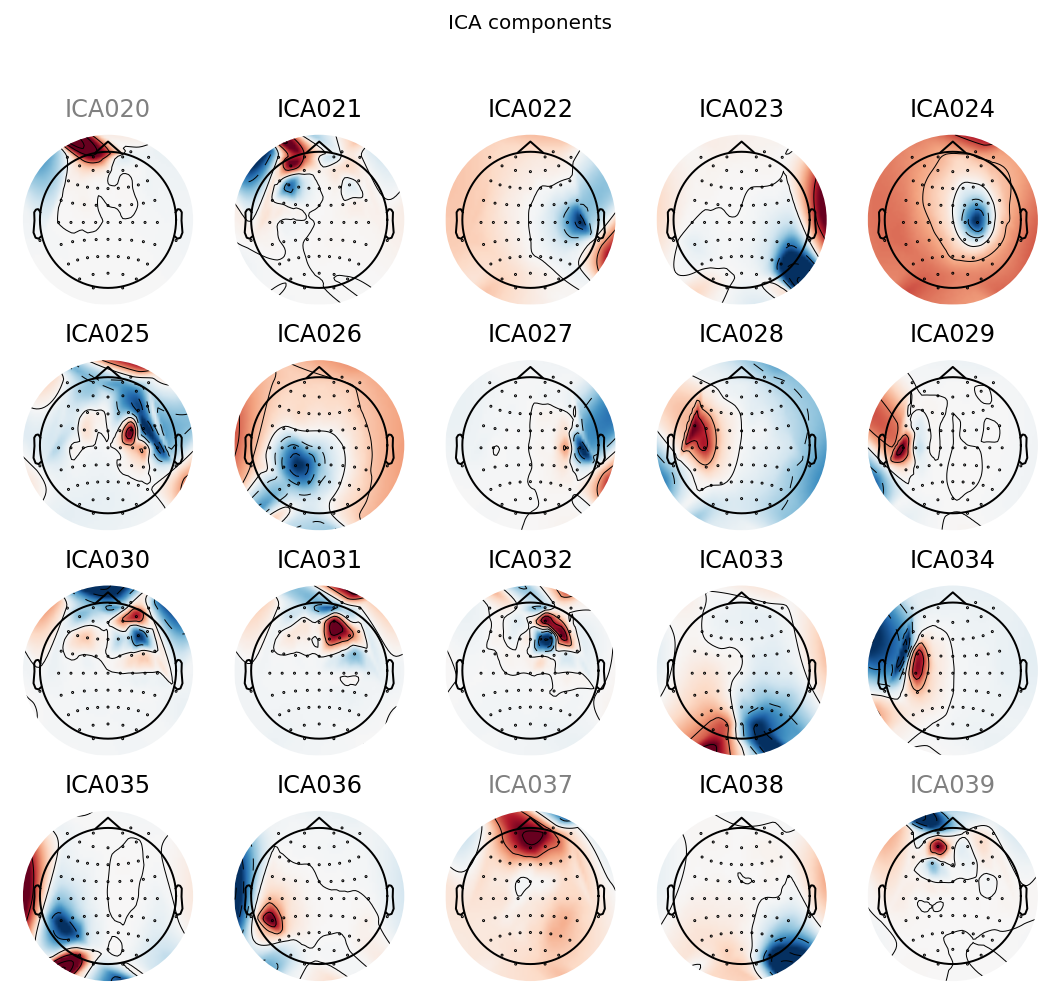

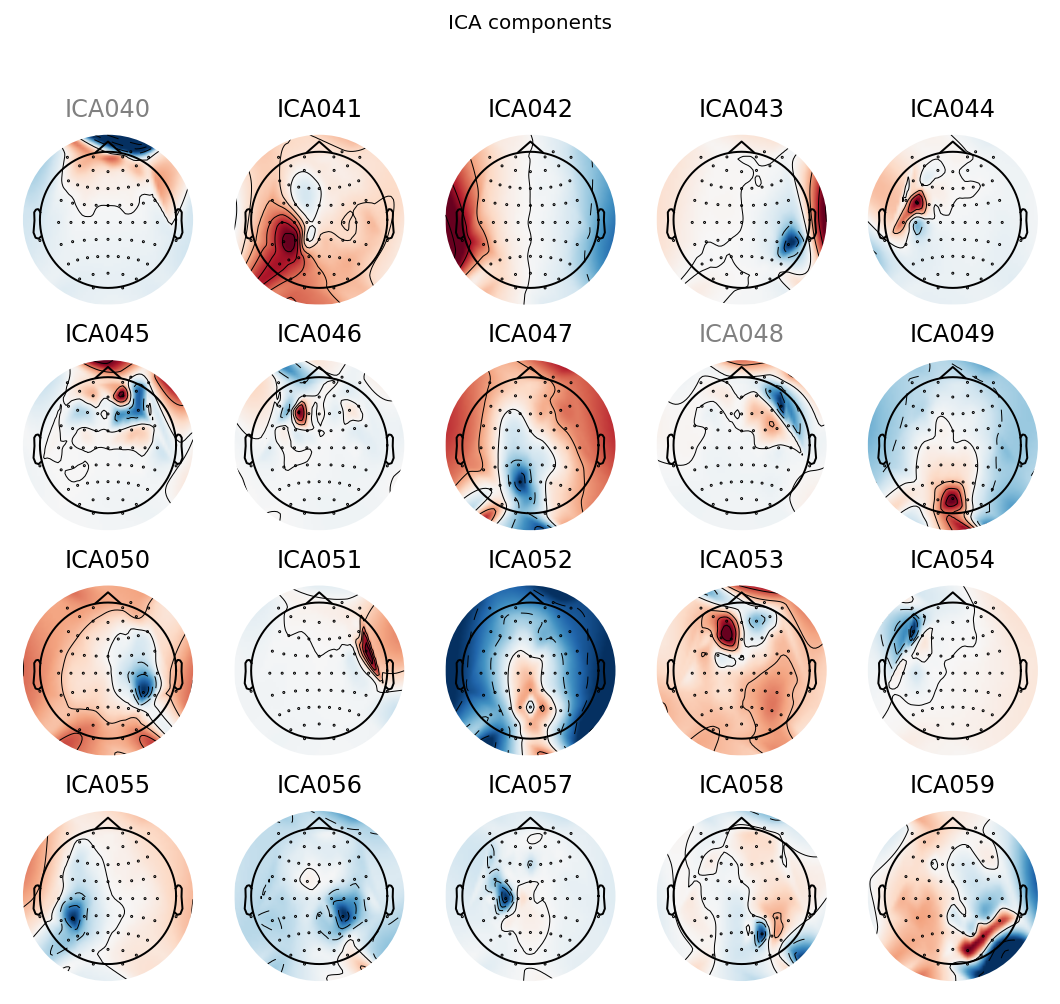

In [11]:
# example plot of ICA components of one subject to identify prototypical eye artifact components (ICs)
ica.plot_components(outlines="skirt");

In [16]:
# these are prototypical ICs representing eye movements - we label these as "bads" in this subjects' data
bads = [15, 19, 37, 40, 20, 39]

This step of visual inspection of ICA objects and identification of "bad" ICs was manually repeated for 6 example subjects. Here, 6 "bad_maps" objects were created. The follwing lines cannot run several times - only once as after the first time the "bad_maps" objects will not be filled anymore. This is a semi-automated preprocessing step.

In [ ]:
# bad_maps = ica.get_components()[:, bads]
# bad_maps2 = ica.get_components()[:, bads]
# bad_maps3 = ica.get_components()[:, bads]
# bad_maps4 = ica.get_components()[:, bads]
# bad_maps5 = ica.get_components()[:, bads]
# bad_maps6 = list(icas.values())[13].get_components()[:, [27, 12]]

In [ ]:
# all_bad_maps = np.hstack([bad_maps, bad_maps2, bad_maps3, bad_maps4, bad_maps5, bad_maps6])

In [17]:
# find events for exploratory segmentation - only for plotting EEG for one subject before and after ICA-artefact
# rejection - here only done for: "wmp06"
events, event_id = mne.events_from_annotations(raw)

Used Annotations descriptions: ['Stimulus/S  9', 'Stimulus/S 20', 'Stimulus/S  6', 'New Segment/', 'Stimulus/S100', 'Stimulus/S  8', 'Stimulus/S 10', 'Stimulus/S  1', 'Stimulus/S  4', 'Stimulus/S  2', 'Stimulus/S  3', 'Stimulus/S  5', 'Stimulus/S  7']


801 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


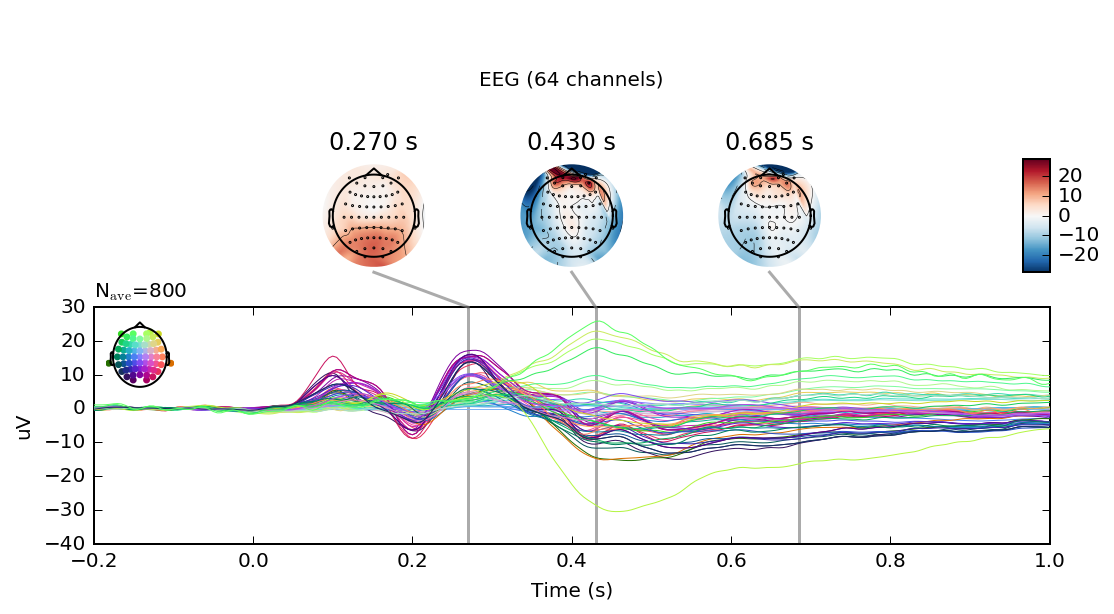

In [23]:
# plotting EKP (before applying ica) - here only for: "wmp06"  (raw and ica loaded above)
mne.Epochs(raw, events, event_id, tmax=1).average().plot_joint();

801 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Transforming to ICA space (60 components)
Zeroing out 10 ICA components


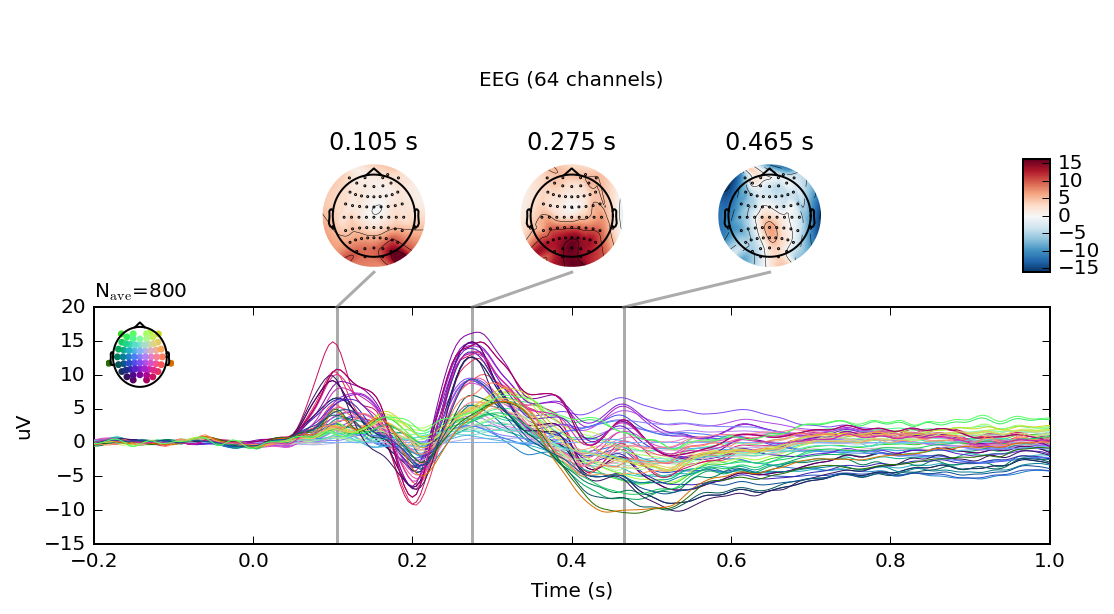

In [24]:
# apply ICA on data (now we use excude the bad ICs from the data) - here only for: "wmp06"  (raw and ica loaded above)
# now we see that data quality is much improved as corrected for the bad ICs
# here the exlude object is filled with the above specified "bads" for this specific subject (is only an example!)
ica.apply(mne.Epochs(raw, events, event_id, tmax=1).average(), exclude=bads).plot_joint();

Now we read (load) ica objects from all participants and identify with "corrmap" those ICs that show the highest similarity (correlation) with all the bad ICs defined above from the 6 example subjects.

These identifed (similar and thus bad) ICs are written in the ica object of each subject - under the name "exclude". So that the ica.exclude object is now filled with subject-specific "bads" (similar to the bad components defined above on the 6 exemple subjects) components.

But the real application of the ICA (were bad ICs are really removed) happens later. Here the subject-specific bad components are only identified, marked and stored (really saved) in the ica.exclude object. 


In [ ]:
icas = {fname: mne.preprocessing.read_ica(fname) for fname in glob(template.format("ica", "*"))}

for ii, ica_template in enumerate(all_bad_maps.T):
    mne.preprocessing.corrmap(list(icas.values()), ica_template,
                              threshold=.8,
                              label="eog" + str(ii), show=False, plot=False)
    
for file, ica in icas.items():
    ica.exclude = list(set(np.hstack(ica.labels_.values()).astype(int)))
    ica.save(file)    

## --> Next steps see Data Analyses Notebook!